#### 타이타닉 
- 1912년 4월에 발생한 사고
- 승선인원 2,223 명 / 사망자 1,514 명

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# # 한글설정
# plt.rcParams["font.family"] = "Malgun Gothic"
# # -설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter(action="ignore")

In [7]:
titanic_df = sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- survived : 생존여부(0:사망, 1:생존)
- sibsp : 같이 탑승한 형제자매/배우자 수
- parch : 같이 탑승한 부모, 자녀 수
- fare : 요금
- embarked : 승선지(C,S,Q)
- deck : 객실번호
- pclass : 1에 가까울수록 좋은 자리
- who : man,woman,child

#### 데이터 탐색

In [9]:
titanic_df.shape

(891, 15)

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# dropna() : NaN 제외한
titanic_df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [17]:
# class 별 탑승자 조회
# titanic_df.groupby("class")["survived"].count()

titanic_df.groupby("class").count()
# titanic_df.groupby("class").std()

# 승객들이 클래스별로 지불한 요금의 중앙값과 평균값
titanic_df.groupby("class")["fare"].median()
titanic_df.groupby("class")["fare"].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [18]:
titanic_df.groupby("class").std(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [22]:
# 생존자 정보(survived or alive) 추출
titanic_df[titanic_df["survived"] == 1]
titanic_df[titanic_df["alive"] == "yes"]
titanic_df.query("alive == 'yes'")
titanic_df.query("survived == 1")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [23]:
# class 별 생존자 정보 추출
titanic_df.query("survived == 1").groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [24]:
# survived,age,parch

titanic_df.query("survived == 1").groupby("class")[["survived","age","parch"]].count()

,survived,age,parch
class,,,
First,136,122,136
Second,87,83,87
Third,119,85,119


In [25]:
titanic_df.groupby("class")["age"].aggregate([min,max,np.median])
titanic_df.groupby("class")["age"].aggregate(["min","max","median"])

,min,max,median
class,,,
First,0.92,80.0,37.0
Second,0.67,70.0,29.0
Third,0.42,74.0,24.0


In [26]:
# 성별을 기준으로 age 컬럼에 대한 최소, 최대, 중앙값 구하기
titanic_df.groupby("sex")["age"].aggregate([min,max,np.median])

,min,max,median
sex,,,
female,0.75,63.0,27.0
male,0.42,80.0,29.0


In [33]:
# age 가 30초과인 승객 대상으로 class별 최소, 최대, 중앙값 구하기
titanic_df.query("age > 30").groupby("class").median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [35]:
# 요금 지불 비용이 20보다 작은 승객 대상으로 class 기준으로 fare 의 중앙값
titanic_df.query("fare < 20").groupby("class")["fare"].median(numeric_only=True)

class
First      0.0000
Second    13.0000
Third      7.8958
Name: fare, dtype: float64

In [37]:
# class, sex 별 나이의 중앙값
titanic_df.groupby(["class",'sex'])["age"].median()

class   sex   
First   female    35.0
        male      40.0
Second  female    28.0
        male      30.0
Third   female    21.5
        male      25.0
Name: age, dtype: float64

In [38]:
titanic_df.groupby(["class",'sex'])["age"].median().unstack()

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


In [39]:
titanic_df.groupby("class")["survived"].count()

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

In [42]:
class_df = titanic_df.groupby("class")["survived"].count()
class_df

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

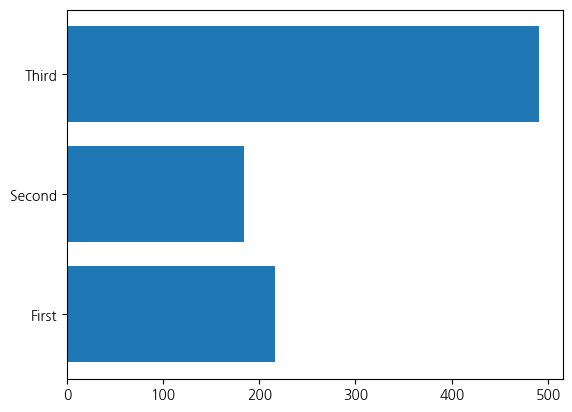

In [43]:
# barh
plt.barh(y=class_df.index,width=class_df.values);

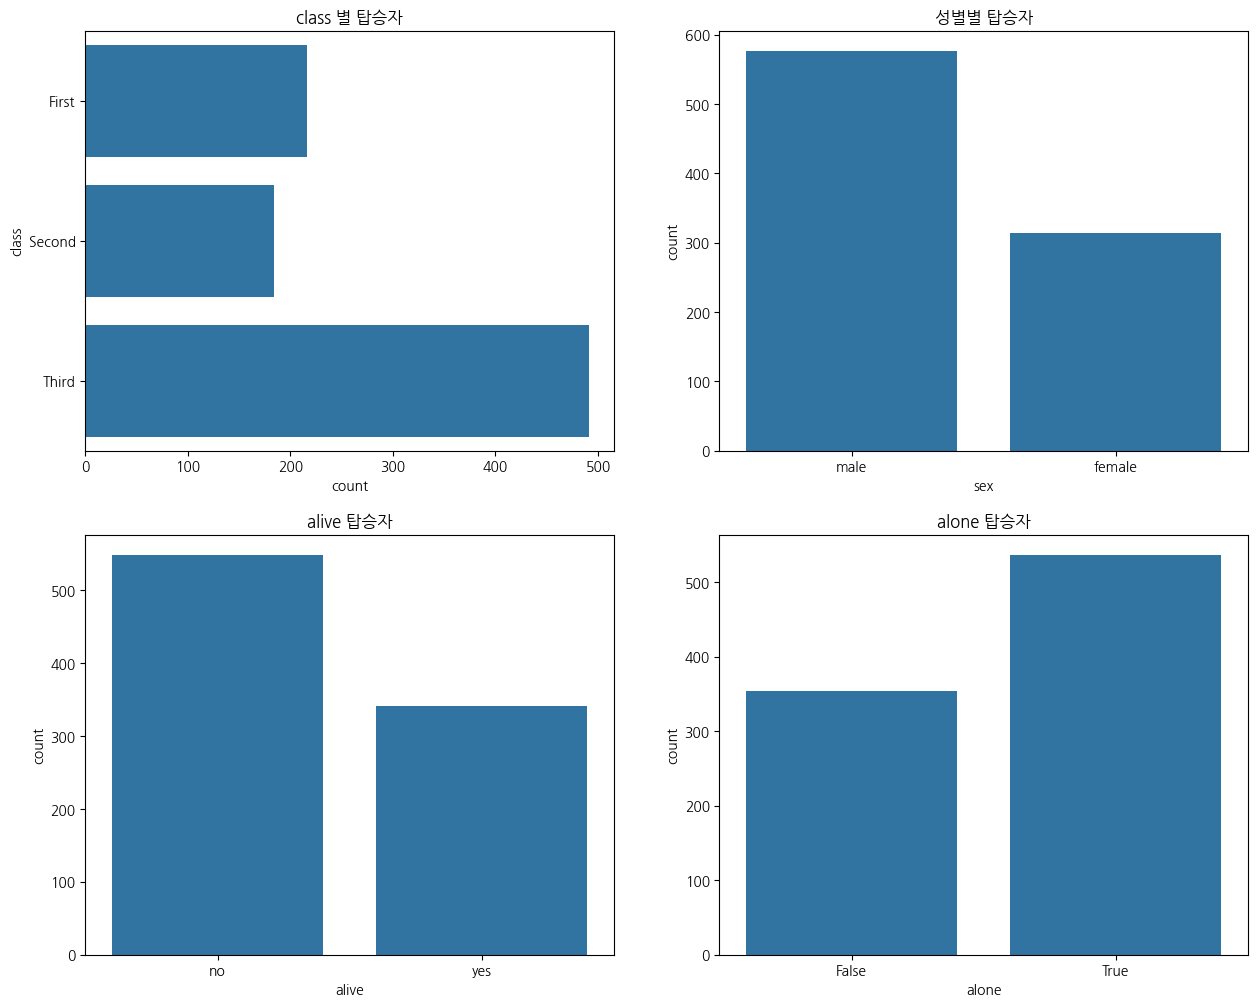

In [52]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.countplot(y="class",data=titanic_df,ax=axes[0,0])
axes[0,0].set_title("class 별 탑승자")

# sns.countplot(x="class",data=titanic_df,ax=axes[0,1])

sns.countplot(x="sex",data=titanic_df,ax=axes[0,1])
axes[0,1].set_title("성별별 탑승자")

sns.countplot(x="alive",data=titanic_df,ax=axes[1,0])
axes[1,0].set_title("alive 탑승자")

sns.countplot(x="alone",data=titanic_df,ax=axes[1,1])
axes[1,1].set_title("alone 탑승자");

# sns.countplot(y="class",data=titanic_df)

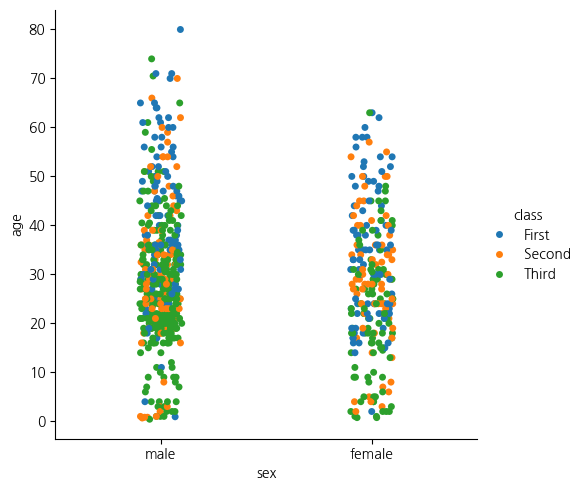

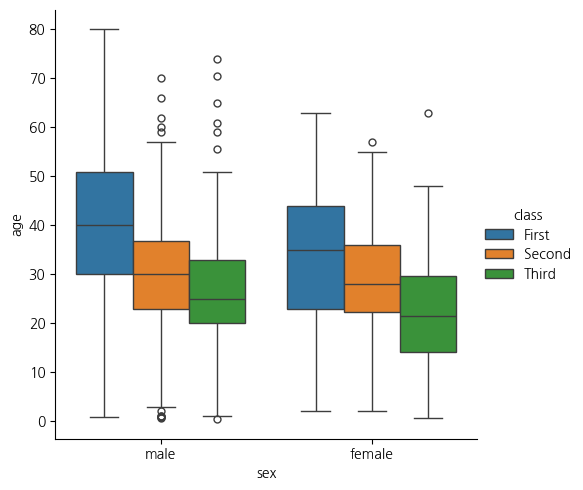

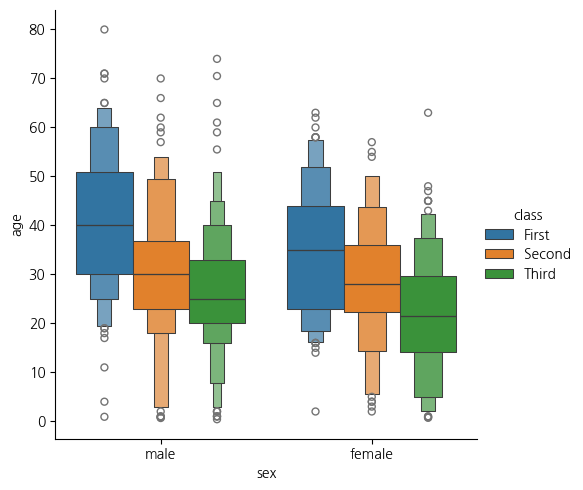

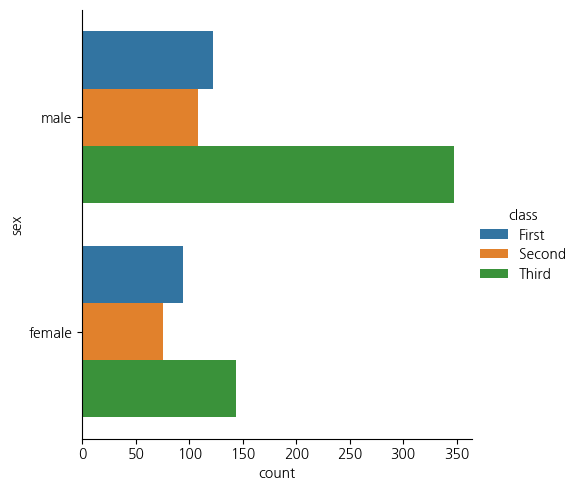

In [63]:
sns.catplot(x="sex",y="age",data=titanic_df, hue="class")
sns.catplot(x="sex",y="age",data=titanic_df, hue="class",kind="box")
sns.catplot(x="sex",y="age",data=titanic_df, hue="class",kind="boxen")
sns.catplot(y="sex",data=titanic_df, hue="class",kind="count")

In [65]:
# class, who 그룹 설정, fare 평균 구하기

titanic_df.groupby(["class","who"])["fare"].mean().unstack(0)

class,First,Second,Third
who,,,
child,139.382633,28.323905,23.220190
man,65.951086,19.054124,11.340213
woman,104.317995,20.868624,15.354351


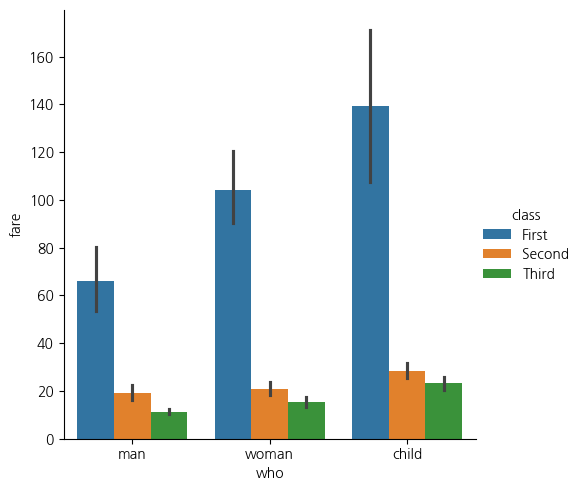

In [66]:
sns.catplot(x="who",y="fare",data=titanic_df, hue="class",kind="bar")

In [68]:
# 클래스별,성별그룹,survived 컬럼에 대한 count()
titanic_df.groupby(["class","sex"])["survived"].count().unstack()

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


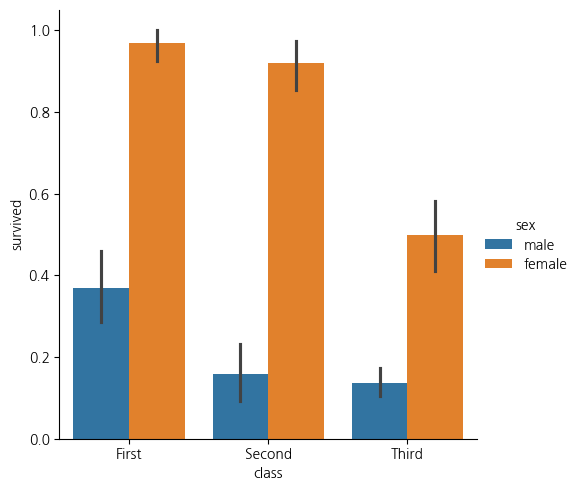

In [72]:
sns.catplot(x="class",y="survived",data=titanic_df, hue="sex",kind="bar")

In [75]:
# who - woman,man,child 가 어느 클래스에 탔는지에 따라 생존율 구하기
# mean 함수 적용됨
titanic_df.pivot_table("survived", index="who", columns="class", margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


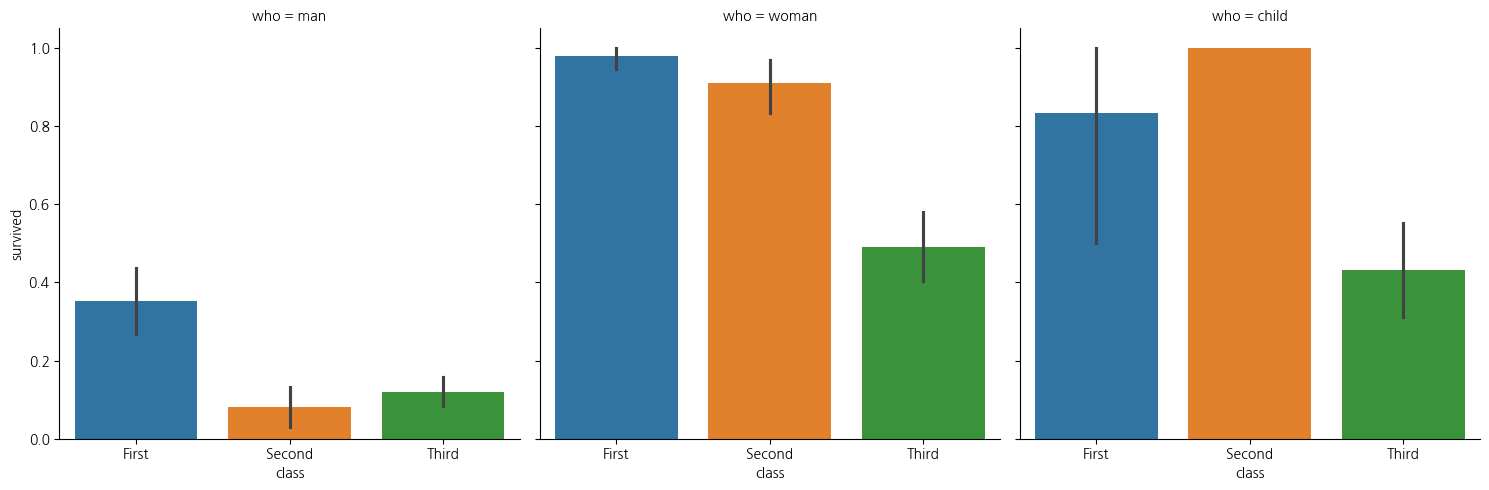

In [77]:
sns.catplot(x="class",y="survived",col="who",kind="bar",data=titanic_df, hue="class")

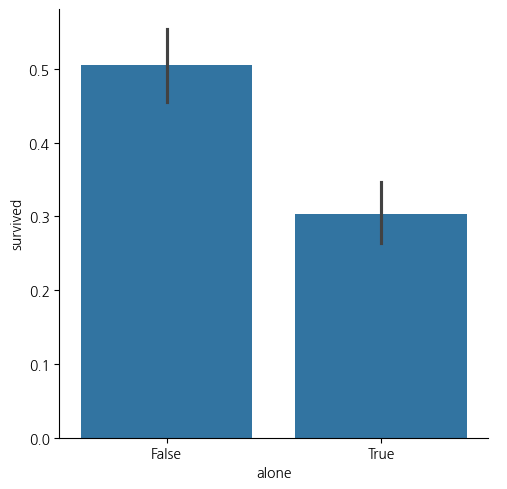

In [80]:
# 혼자 혹은 여려명 생존율이 누가 더 높은가?
# titanic_df["alone"]

sns.catplot(x="alone",y="survived",kind="bar",data=titanic_df)